# Data Cleaning and Preparation

## Objective
The goal of this notebook is to clean the dataset and prepare it for modeling.
All decisions in this step are based on the issues identified during the data understanding phase.

This notebook focuses on **solving problems**, not discovering them.


## Outcome
At the end of this notebook, the dataset will be:
- Clean
- Consistent
- Well-structured
- Ready for modeling and evaluation


## import needed libarary & set style 

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

sys.path.append(str(Path("../src").resolve()))

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [121]:
from plot_style import set_plot_style

set_plot_style()

## 1. Data Loading



In [122]:
from data_loader import load_data
df = load_data("../data/raw/Life Expectancy Data.csv")

## Column Name Cleaning
- Removing leading and trailing spaces
- Normalizing multiple spaces into a single space
- Replacing spaces with underscores


In [123]:
df.columns = df.columns.str.strip()
df.columns 

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [124]:
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True)
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [125]:
df.columns = df.columns.str.replace(' ', '_')


In [126]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness_1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

# Data Type Optimization

In [127]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life_expectancy                    float64
Adult_Mortality                    float64
infant_deaths                        int64
Alcohol                            float64
percentage_expenditure             float64
Hepatitis_B                        float64
Measles                              int64
BMI                                float64
under-five_deaths                    int64
Polio                              float64
Total_expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness_1-19_years                float64
thinness_5-9_years                 float64
Income_composition_of_resources    float64
Schooling                          float64
dtype: object

In [128]:
# Convert categorical features
df['Status'] = df['Status'].astype('category')
df['Country'] = df['Country'].astype('category')

In [129]:
df.dtypes

Country                            category
Year                                  int64
Status                             category
Life_expectancy                     float64
Adult_Mortality                     float64
infant_deaths                         int64
Alcohol                             float64
percentage_expenditure              float64
Hepatitis_B                         float64
Measles                               int64
BMI                                 float64
under-five_deaths                     int64
Polio                               float64
Total_expenditure                   float64
Diphtheria                          float64
HIV/AIDS                            float64
GDP                                 float64
Population                          float64
thinness_1-19_years                 float64
thinness_5-9_years                  float64
Income_composition_of_resources     float64
Schooling                           float64
dtype: object

###  Divied data to categorical col and numerical col

In [130]:
cat_cols = df.select_dtypes(include='category').columns
num_cols = df.select_dtypes(exclude='category').columns
print("Categorical columns:", cat_cols.tolist())
print("Numerical columns:", num_cols.tolist())

Categorical columns: ['Country', 'Status']
Numerical columns: ['Year', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness_1-19_years', 'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling']


# Handling Missing Values

- for 3_top missing values 

In [131]:
groupwise_features = ['Population', 'GDP', 'Hepatitis_B']

for col in groupwise_features:
    df[col] = df.groupby('Status')[col].transform(
        lambda x: x.fillna(x.median())
    )

C:\Users\digital\AppData\Local\Temp\ipykernel_5104\236185889.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[col] = df.groupby('Status')[col].transform(
C:\Users\digital\AppData\Local\Temp\ipykernel_5104\236185889.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[col] = df.groupby('Status')[col].transform(
C:\Users\digital\AppData\Local\Temp\ipykernel_5104\236185889.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this wa

In [132]:

df.isnull().sum().sort_values(ascending=False)

Total_expenditure                  226
Alcohol                            194
Income_composition_of_resources    167
Schooling                          163
thinness_5-9_years                  34
thinness_1-19_years                 34
BMI                                 34
Diphtheria                          19
Polio                               19
Life_expectancy                     10
Adult_Mortality                     10
Population                           0
GDP                                  0
HIV/AIDS                             0
Country                              0
Year                                 0
Measles                              0
Hepatitis_B                          0
percentage_expenditure               0
infant_deaths                        0
Status                               0
under-five_deaths                    0
dtype: int64

In [133]:
df = df.dropna(subset=['Life_expectancy', 'Adult_Mortality'])

In [134]:
median_features = [
    'Total_expenditure',
    'Alcohol',
    'Income_composition_of_resources',
    'Schooling',
    'BMI',
    'Polio',
    'Diphtheria',
    'thinness_1-19_years',
    'thinness_5-9_years'
]

for col in median_features:
    df[col] = df[col].fillna(df[col].median())

In [135]:
df.isnull().sum().sum()

0

In [136]:
df.shape

(2928, 22)

# Handling Skewed Features

In [137]:
skewed_features = [
    'GDP',
    'Population',
    'percentage_expenditure',
    'infant_deaths',
    'under-five_deaths',
    'Measles',
    'HIV/AIDS'
]

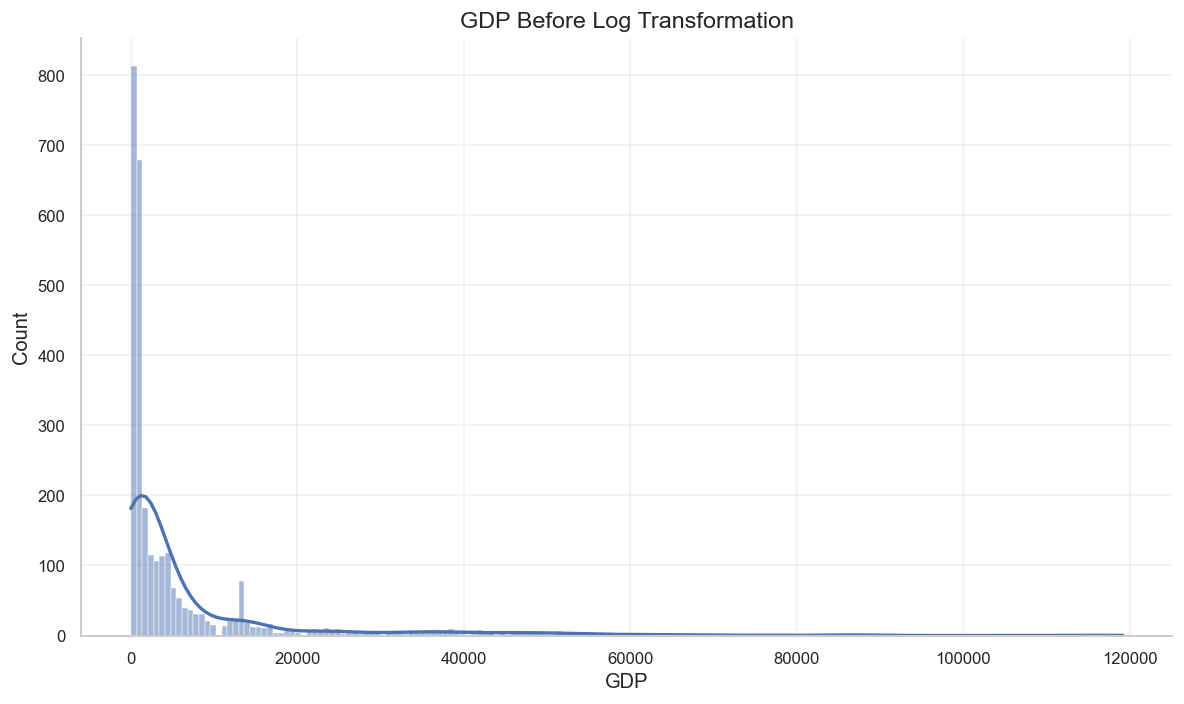

In [138]:
sns.histplot(df['GDP'], kde=True)
plt.title('GDP Before Log Transformation')
plt.show()


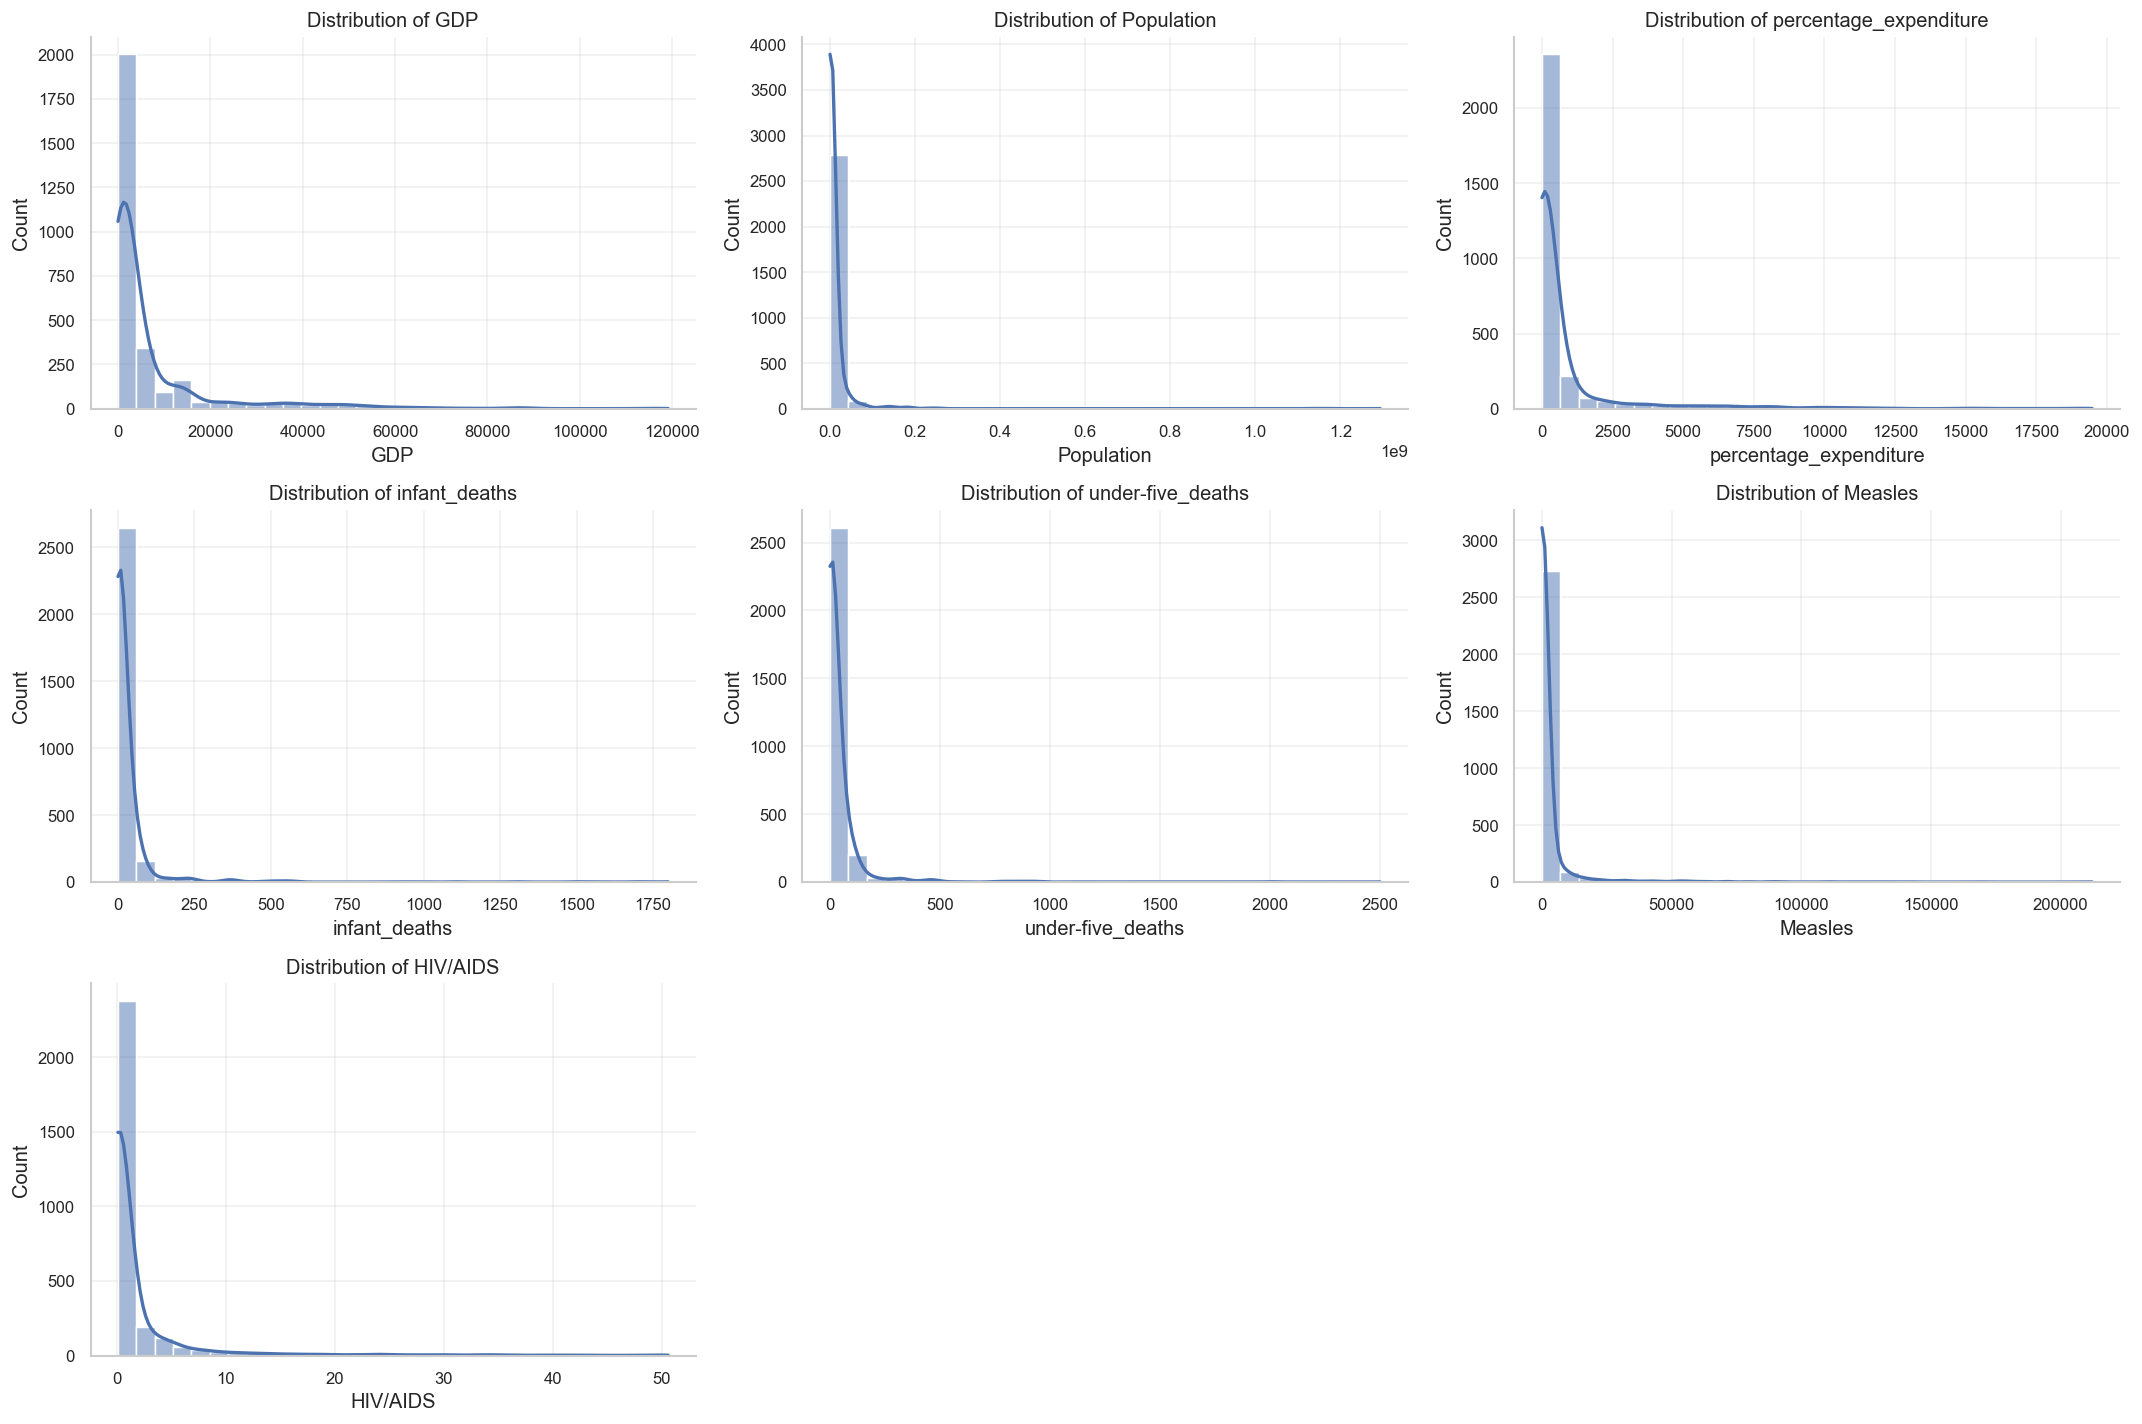

In [139]:
# number of columns in the grid
n_cols = 3
n_rows = int(np.ceil(len(skewed_features) / n_cols))

# create figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(skewed_features):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [141]:
for col in skewed_features:
    df[col] = np.log1p(df[col])

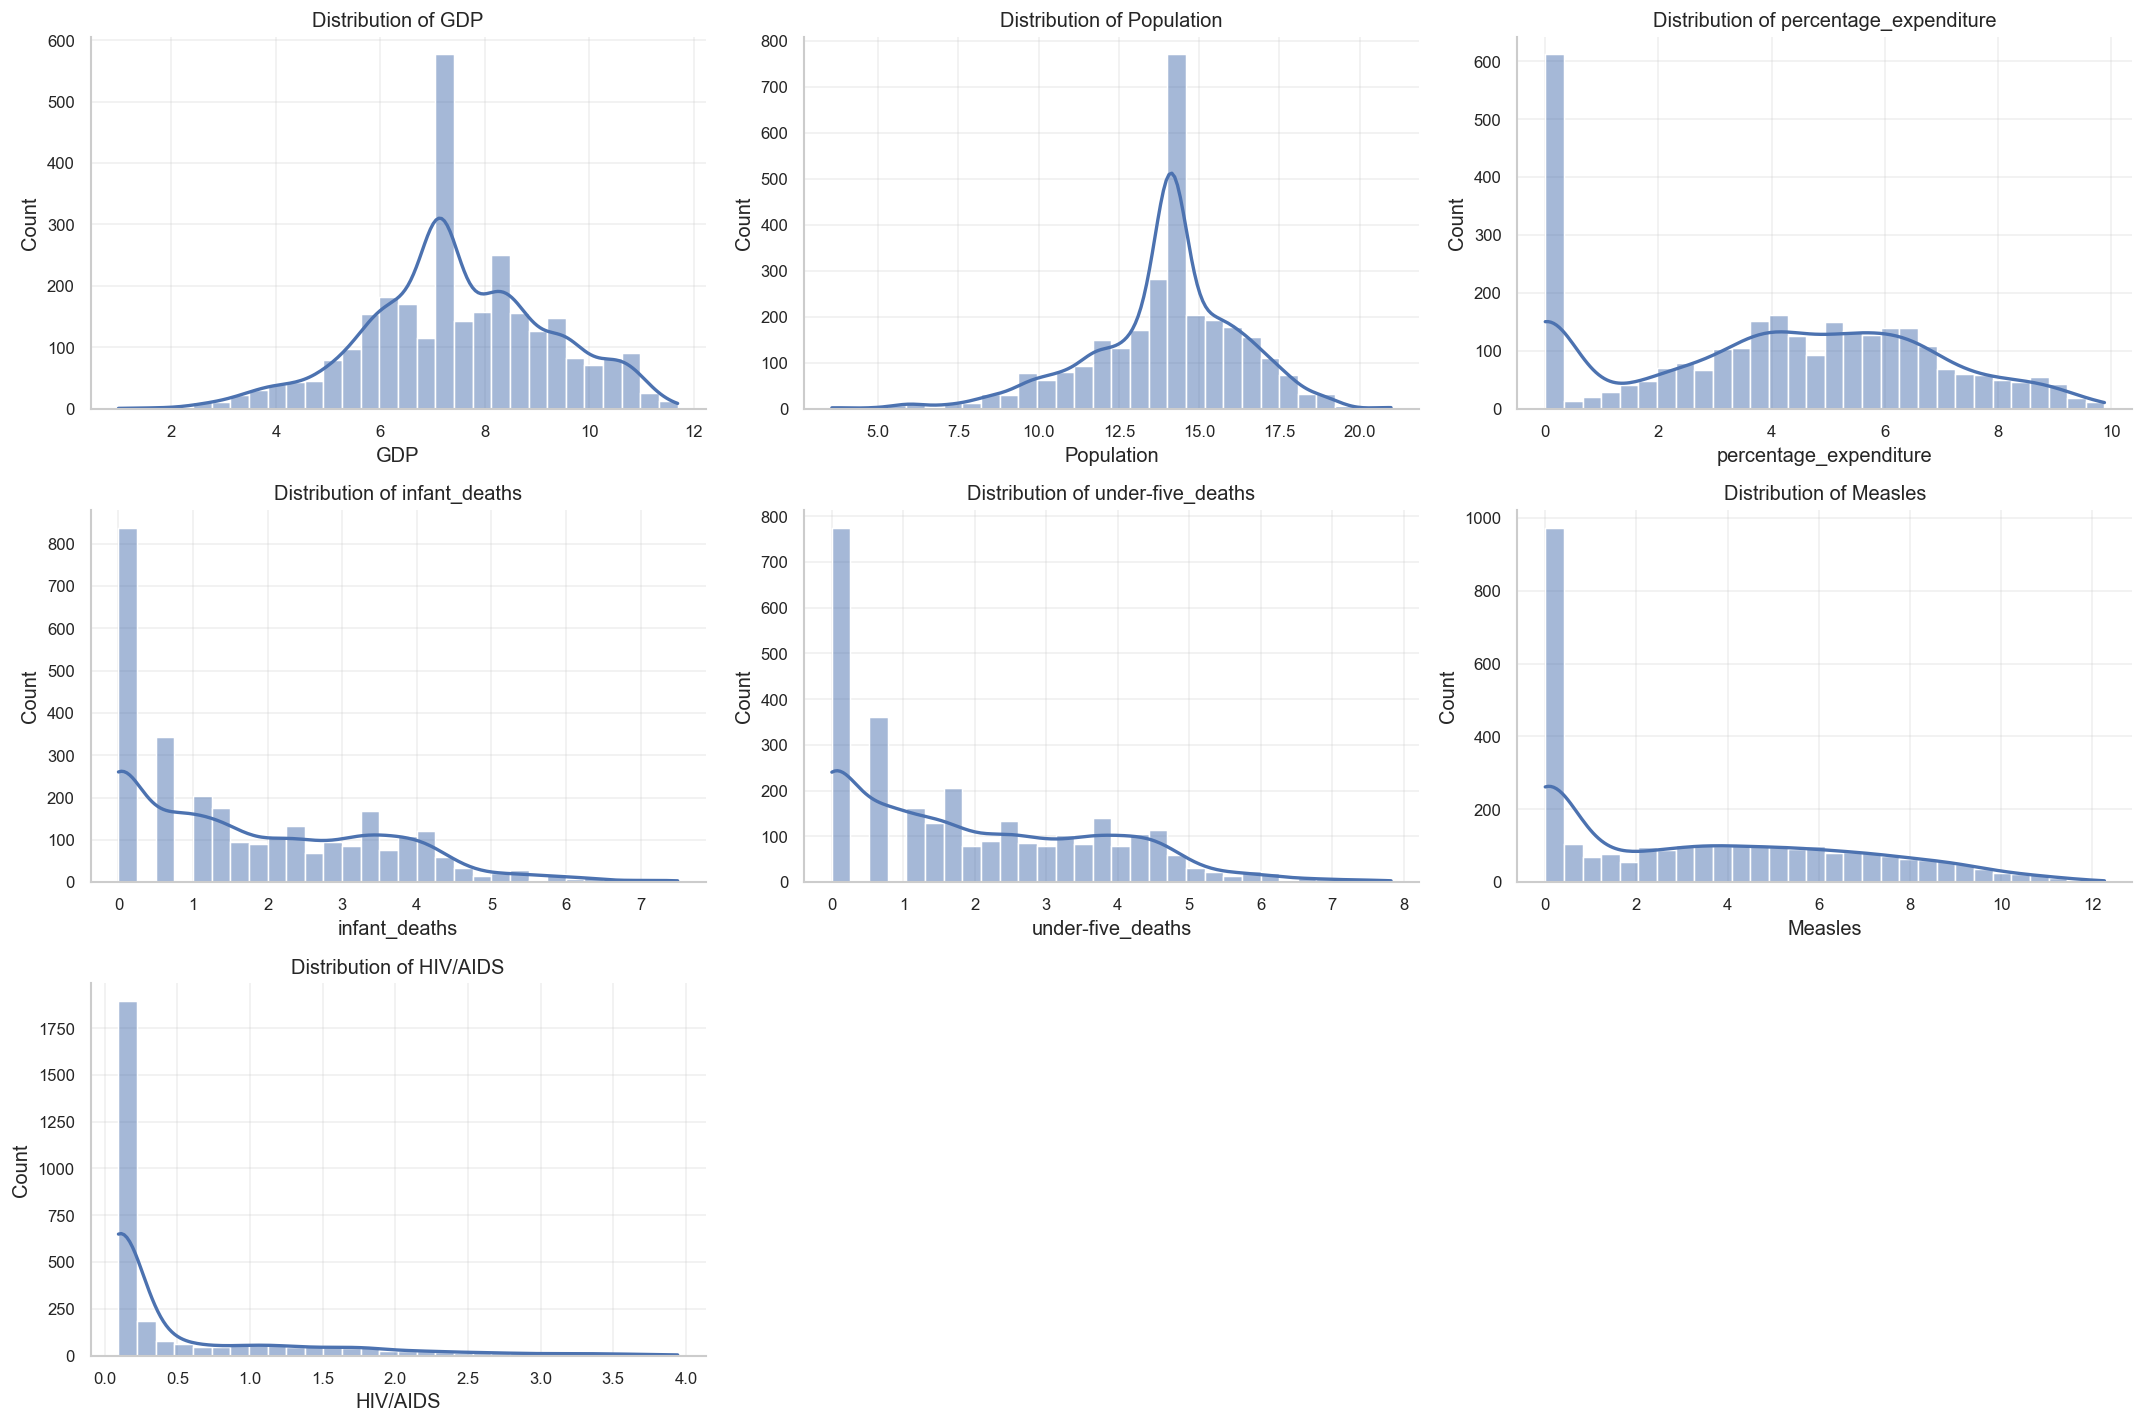

In [142]:
# number of columns in the grid
n_cols = 3
n_rows = int(np.ceil(len(skewed_features) / n_cols))

# create figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(skewed_features):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Effect of Log Transformation on Skewed Features

Before applying log transformation, several numerical features such as `GDP`, `Population`,
`percentage_expenditure`, `infant_deaths`, `under-five_deaths`, `Measles`, and `HIV/AIDS`
showed strong right skewness with extreme values dominating the distributions.

After applying `log1p` transformation:
- The distributions became more balanced and closer to normal.
- The effect of extreme values was significantly reduced.
- The spread of data became clearer, making patterns easier to observe.
- Important variations between countries were preserved without removing any data.

Log transformation helped stabilize highly skewed features and made them more suitable
for modeling, especially for algorithms sensitive to scale and extreme values.


In [143]:
df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,4.143135,0.01,4.280542,65.0,7.051856,...,6.0,8.16,65.0,0.09531,6.372055,17.334091,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,4.174387,0.01,4.311116,62.0,6.200509,...,58.0,8.18,62.0,0.09531,6.419501,12.699497,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,4.204693,0.01,4.307023,64.0,6.066108,...,62.0,8.13,64.0,0.09531,6.450067,17.272826,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,4.248495,0.01,4.371777,67.0,7.933080,...,67.0,8.52,67.0,0.09531,6.508708,15.123021,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,4.276666,0.01,2.091507,68.0,8.011023,...,68.0,7.87,68.0,0.09531,4.167242,14.906964,18.2,18.2,0.454,9.5


In [144]:
df.shape 

(2928, 22)

In [145]:
df.to_csv(
    '../data/processed/life_expectancy_clean.csv',
    index=False
)


### Clean Dataset Saved

The cleaned dataset was saved to the `data/processed` directory.
This version of the data will be used as the input for preprocessing,
modeling, and dashboard development to ensure consistency across the project.
